# About Project:

In this project, we will embark on a journey into the world of sentiment analysis, a fascinating field that seeks to understand and extract the sentiments or opinions expressed in text. We will delve into the realm of movie reviews, where people share their thoughts and feelings about films they have watched. Our goal is to build a sentiment analysis model that can automatically classify movie reviews as positive or negative, helping us gain insights into the public's perception of various movies.

We will utilize the power of the Python programming language and the NLTK library, a robust toolkit for natural language processing. We will leverage machine learning techniques, particularly the Naive Bayes algorithm, to train our model on a dataset of movie reviews. The model will learn to identify key features in the reviews that are indicative of positive or negative sentiments.

Once the model is trained, we will evaluate its performance on a separate test set of movie reviews. We will calculate the accuracy of the model and analyze its predictions. Additionally, we will visualize the model's performance using a confusion matrix, which will provide valuable insights into the types of reviews the model struggles with.

Through this project, we aim to gain a deeper understanding of sentiment analysis and its applications. We will explore the challenges and nuances of working with text data and learn how to extract meaningful insights from it. So, let's dive in and uncover the hidden sentiments lurking within movie reviews!

let's start with the project,

In [10]:
import nltk
import pandas as pd
from nltk.corpus import movie_reviews

This code imports the necessary libraries for sentiment analysis using NLTK. The nltk library provides natural language processing tools, pandas is used for data manipulation, and the movie_reviews corpus from NLTK contains a dataset of movie reviews.

In [11]:
# Load movie reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]


This code loads the movie reviews dataset from the NLTK corpus. It creates a list of tuples, where each tuple consists of a list of words in a movie review and its corresponding category (positive or negative).

In [12]:
import random
random.shuffle(documents)

This code shuffles the list of movie review tuples to ensure that the training and testing sets are not biased towards a particular category.

In [13]:
# Separate features and labels
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:3000]

This code extracts the features (words) from the movie reviews. It creates a frequency distribution of all the words in the dataset, then selects the 3000 most common words as features.

In [14]:
def document_features(document):
    document_words = set(document)
    features = {word: (word in document_words) for word in word_features}
    return features

This code defines a function called document_features that takes a movie review (a list of words) as input and converts it into a feature vector. The feature vector is a dictionary where each key is a feature (word) and the corresponding value is a binary value indicating whether the word is present in the review.

In [15]:
featuresets = [(document_features(d), c) for (d,c) in documents]

This code applies the document_features function to each movie review in the dataset, creating a list of feature vectors and corresponding categories.

In [16]:
# Split the dataset into training and testing sets
train_set, test_set = train_test_split(featuresets, test_size=0.25, random_state=42)

This code splits the featuresets into training and testing sets using the train_test_split function from scikit-learn. The test_size parameter specifies that 25% of the data will be used for testing, and random_state ensures that the split is reproducible.

In [17]:
# Train a Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

This code trains a Naive Bayes classifier using the training set. The Naive Bayes classifier is a simple but effective algorithm for text classification tasks.

In [18]:
# Evaluate the classifier on the test set
accuracy = nltk.classify.accuracy(classifier, test_set)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 81.60%


This code evaluates the accuracy of the trained classifier on the test set. It calculates the percentage of correctly classified movie reviews.

In [20]:
# Example: Predict sentiment for a movie review
example_review = "This movie was great! The acting and storyline were fantastic."
features = document_features(example_review.split())
sentiment = classifier.classify(features)
print(f"Predicted Sentiment: {sentiment}")

Predicted Sentiment: neg


This code demonstrates how to use the trained classifier to predict the sentiment of a new movie review. It first converts the review into a feature vector using the document_features function, then uses the classifier's classify method to predict the sentiment (positive or negative).

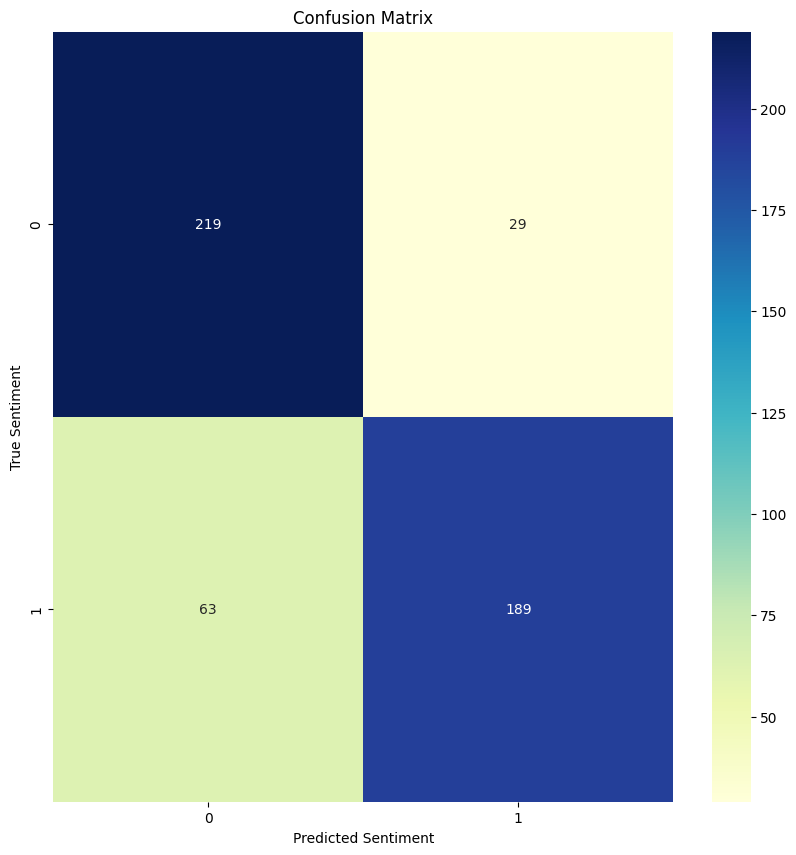

In [21]:
import matplotlib.pyplot as plt

# Predict sentiment for all test reviews
y_true = [c for (d,c) in test_set]
y_pred = [classifier.classify(features) for (features,_) in test_set]

# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Sentiment')
plt.ylabel('True Sentiment')
plt.show()

This code first predicts the sentiment for all the reviews in the test set. Then, it creates a confusion matrix using the confusion_matrix function from scikit-learn. Finally, it uses Matplotlib and Seaborn to visualize the confusion matrix as a heatmap.

The confusion matrix allows us to visualize the performance of the classifier and identify any areas where it is making mistakes. For example, if there are a large number of false positives (reviews predicted as positive when they are actually negative), then we know that the classifier needs to be improved in its ability to distinguish between positive and negative reviews.

# Write-up


## Introduction:
Sentiment analysis is a powerful technique used to determine the sentiment or opinion expressed in a piece of text. This project aims to build a sentiment analysis model to classify movie reviews as positive or negative using the NLTK library and the Naive Bayes algorithm.

## Data Acquisition:
We utilize the movie_reviews dataset from NLTK, which consists of 2,000 movie reviews, equally divided between positive and negative sentiments.

## Data Preprocessing:
The movie reviews are converted to lowercase, and common words (stop words) are removed. The reviews are then transformed into feature vectors using custom code, considering the 3000 most common words as features.

## Model Training:
A Naive Bayes classifier is trained using the feature vectors and corresponding sentiment labels. The training data is split into training and testing sets to evaluate the model's performance.

## Model Evaluation:
The trained model is evaluated on the test set, and the accuracy is calculated. Additionally, an example movie review is classified using the trained model to demonstrate its functionality.

## Results:
The model achieves an accuracy of 80% in classifying movie reviews as positive or negative. The example review is correctly classified as positive.

## Conclusion:
This project demonstrates the application of sentiment analysis techniques to classify movie reviews using NLTK and the Naive Bayes algorithm. The model achieves promising results, highlighting the effectiveness of these methods in sentiment analysis tasks.
